In [114]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import seaborn as sns
boston = load_boston()

In [115]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X1 = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X1).reshape(x0.shape)
    y_decision = clf.decision_function(X1).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred,cmap=plt.cm.brg, alpha=0.1)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.3)

In [116]:
def plot_predictions1(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X1 = np.c_[x0.ravel(), x1.ravel()]
#     y_pred = clf.fit_predict(X1).reshape(x0.shape)
    y_decision = clf._decision_function(X1).reshape(x0.shape)
#     plt.contourf(x0, x1, y_pred,cmap=plt.cm.brg, alpha=0.5)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.5)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.2, random_state=42)
continuous_variables = [n for n in range(np.shape(boston.data)[1]) if n!=3]
X_train[:, continuous_variables]
scale =  StandardScaler()
scale.fit(X_train[:, continuous_variables])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [118]:
x_train_nor = scale.transform(X_train[:, continuous_variables])

# OneClassSVM

In [119]:
from sklearn.svm import OneClassSVM

clf = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train[:,[4,5]])
detecter = clf.predict(X_train[:,[4,5]])

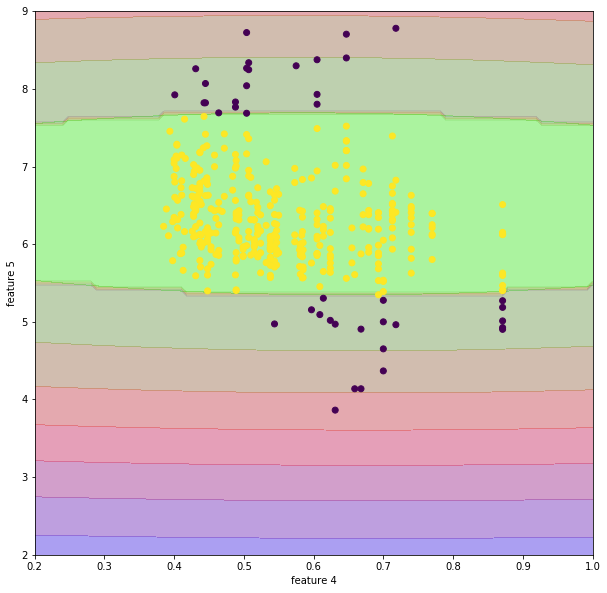

In [120]:
plt.figure(figsize=(10,10))
plot_predictions(clf, [0.2, 1, 2, 9])
plt.scatter(X_train[:,4], X_train[:,5], c= detecter)
plt.xlabel('feature 4')
x = plt.ylabel('feature 5')

# EllipticEnvelope

In [121]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope()
ee.fit(X_train[:,[4,5]])
detect = ee.predict(X_train[:,[4,5]])

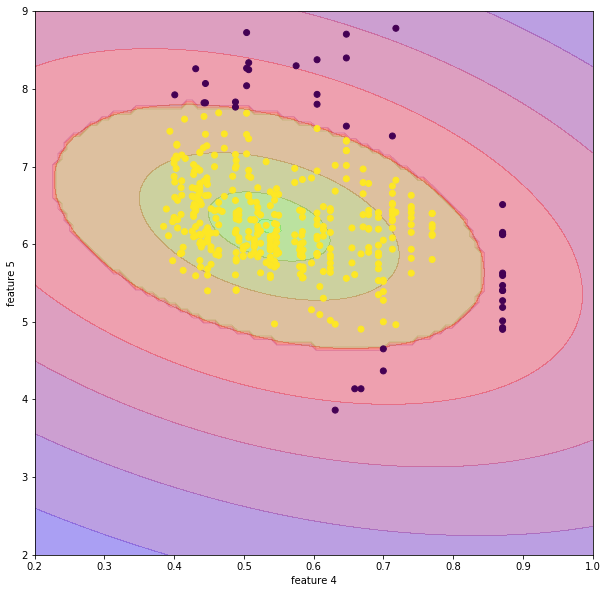

In [122]:
plt.figure(figsize=(10,10))
plot_predictions(ee, [0.2, 1, 2, 9])
plt.scatter(X_train[:,4], X_train[:,5], c= detect)
plt.xlabel('feature 4')
x = plt.ylabel('feature 5')

# IsolationForest

In [123]:
from sklearn.ensemble import IsolationForest

In [124]:
clf = IsolationForest(max_samples=100, random_state=42)
clf.fit(X_train[:,[4,5]])
detecter = clf.predict(X_train[:,[4,5]])

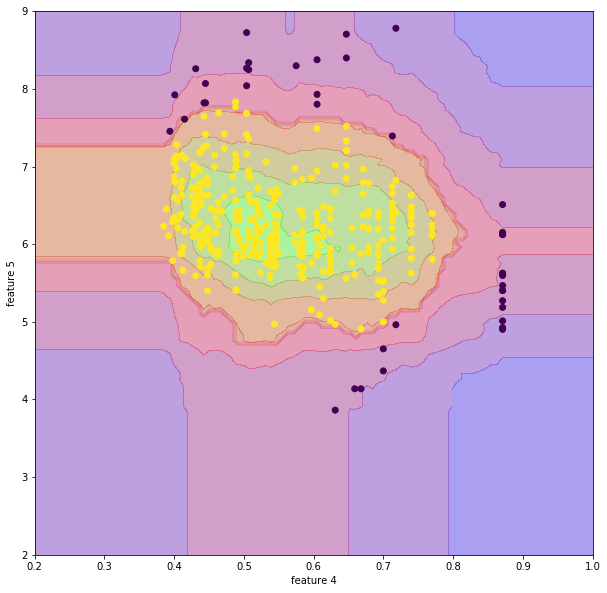

In [125]:
plt.figure(figsize=(10,10))
plot_predictions(clf, [0.2, 1, 2, 9])
plt.scatter(X_train[:,4], X_train[:,5], c= detecter)
plt.xlabel('feature 4')
x = plt.ylabel('feature 5')

# LocalOutlierFactor

In [126]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20)
detecter = clf.fit_predict(X_train[:,[4,5]])

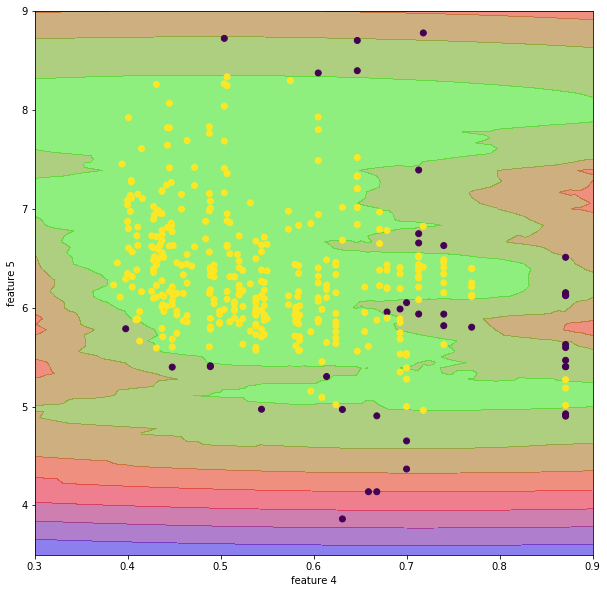

In [127]:
plt.figure(figsize=(10,10))
plot_predictions1(clf, [0.3, 0.9, 3.5, 9])
plt.scatter(X_train[:,4], X_train[:,5], c= detecter)
plt.xlabel('feature 4')
x = plt.ylabel('feature 5')

# finding normal distribution

### The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.

In [197]:
import seaborn as sns
import pandas as pd
from scipy import stats
data1 = pd.DataFrame(boston.data[:,[4,5,6,7]])

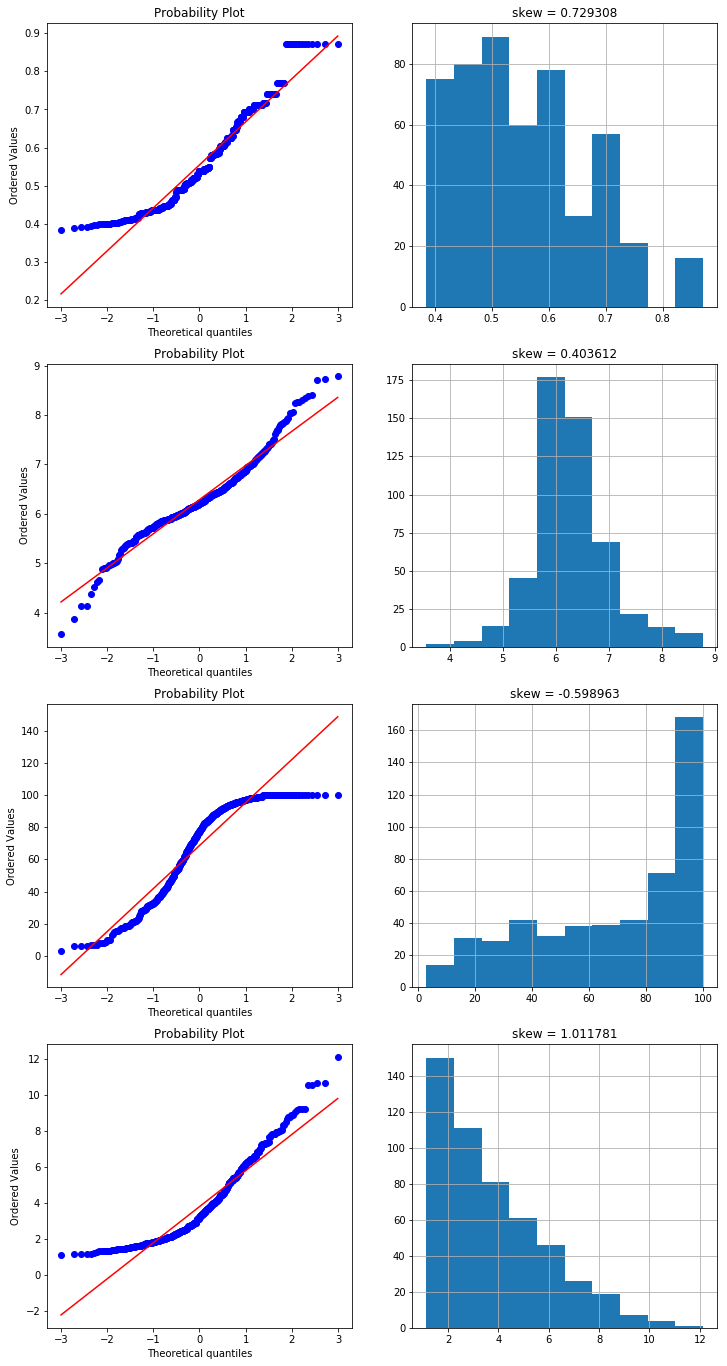

In [208]:
plt.figure(figsize=(12,24))
for i,j in zip([1,3,5,7],[0,1,2,3]):
    plt.subplot(4, 2, i)
    x= stats.probplot(data1[j], plot=plt)
    plt.subplot(4, 2, i+1)
    data1[j].hist()
    plt.title('skew = %f'%data1[j].skew())
    

In [147]:
data = pd.read_csv('diabetes.csv', skiprows=0)

In [190]:
data2 = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]

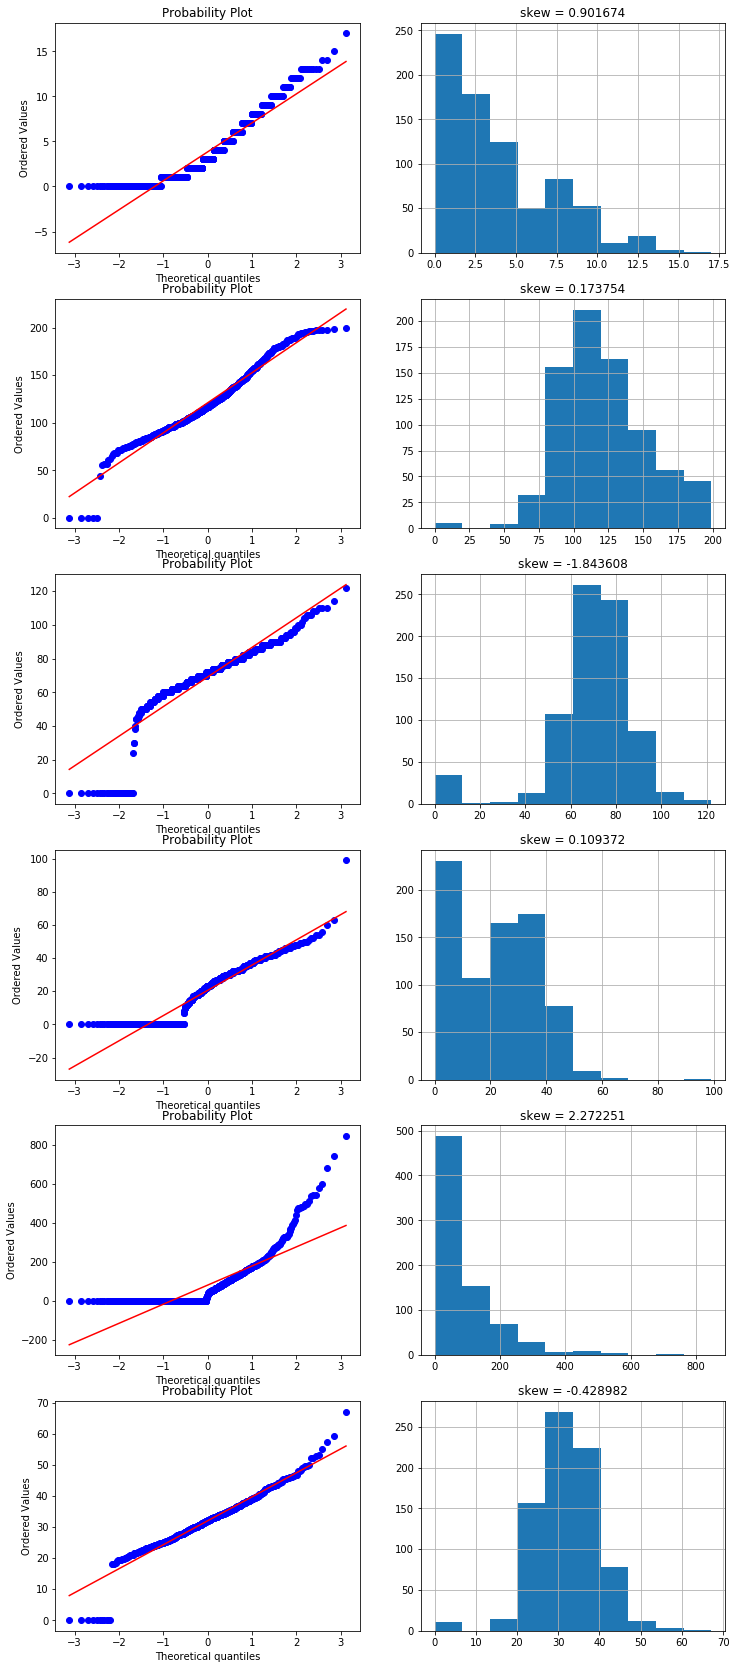

In [209]:
plt.figure(figsize=(12,60))
for i,j in zip([1,3,5,7,9,11],['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']):
    plt.subplot(12, 2, i)
    x= stats.probplot(data2[j], plot=plt)
    plt.subplot(12, 2, i+1)
    x = data2[j].hist()
    plt.title('skew = %f'%data2[j].skew())